In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:

df= pd.read_csv('profiles.csv')

In [ ]:
# encoding the drugs column
drugs_mapping= {'never' : 0, 'sometimes' : 1, 'often' : 2}
df['drugs_encoded'] = df.drugs.map(drugs_mapping)





In [6]:
#print the amount of nan in df.body_type:
print(df.body_type.isna().sum())



5296


In [12]:
#Feature Engineering for body_type
df['fitness_level'] = df.body_type.map({
    "fit": 3,
    "athletic": 3,
    "jacked": 3,
    "average": 2,
    "a little extra": 2,
    "curvy": 2,
    "skinny": 1,
    "full figured": 1,
    "overweight": 1,
    "used up": 1,
    "rather not say": 1
})
df['fitness_level'].fillna(0, inplace=True)





In [41]:
#combining features & labels, then dropping all rows wich have missing values
labels= df.income
features= df[['drugs_encoded', 'fitness_level']]
features_and_labels= features.join(labels)
features_and_labels= features_and_labels.dropna()








In [46]:
#normalize the features and labels:
x = features_and_labels
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
 
features_and_labels = pd.DataFrame(x_scaled, columns=features_and_labels.columns)


In [ ]:
#use "elbow method" to find the most optimal amount of clusters
inertias = []
ks = range(1, 10)

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(features_and_labels)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [47]:
# training and fitting the model
model = KMeans(n_clusters= 3)
model.fit(features_and_labels)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

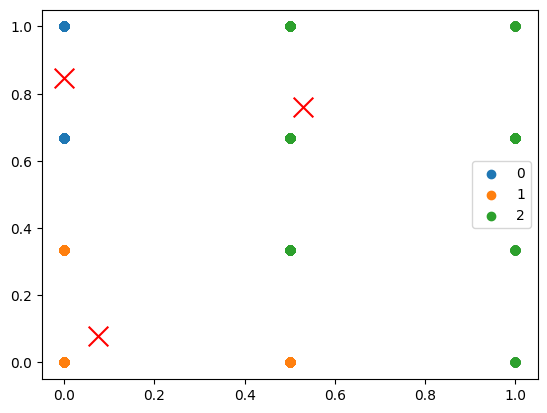

In [53]:
#Visualize the cluster
labels= model.labels_
centroids= model.cluster_centers_

# get x, y arrays for the scatter plot
x = features_and_labels['drugs_encoded']
y = features_and_labels['fitness_level']

# get the unique labels
unique_labels = np.unique(labels)

# plot the data points for each cluster with a different color
for label in unique_labels:
    plt.scatter(x[labels == label], y[labels == label], label=label)

# plot the centroids
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200)

# set the legend and show the plot
plt.legend()
plt.show()










In [49]:
#evaluate model based on silhouette score
print(silhouette_score(features_and_labels, labels))

0.6539958409564218


In [52]:
#add the labels to the original dataset
features_and_labels['cluster'] = model.labels_
print(features_and_labels.cluster.value_counts())

0    29799
1     9318
2     6749
Name: cluster, dtype: int64
